In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
def generate(index):
    if index == 1 :
        cov = [[0.8,0],[0,0.8]]
        mean = [-1,-1]
        return np.random.multivariate_normal(mean, cov, 700).T
        
    cov = [[0.75,-0.2],[-0.2,0.6]]
    mean = [1,1]
    return np.random.multivariate_normal(mean, cov, 300).T
   
    




x1,x2 = generate(1)
y1,y2 = generate(2)

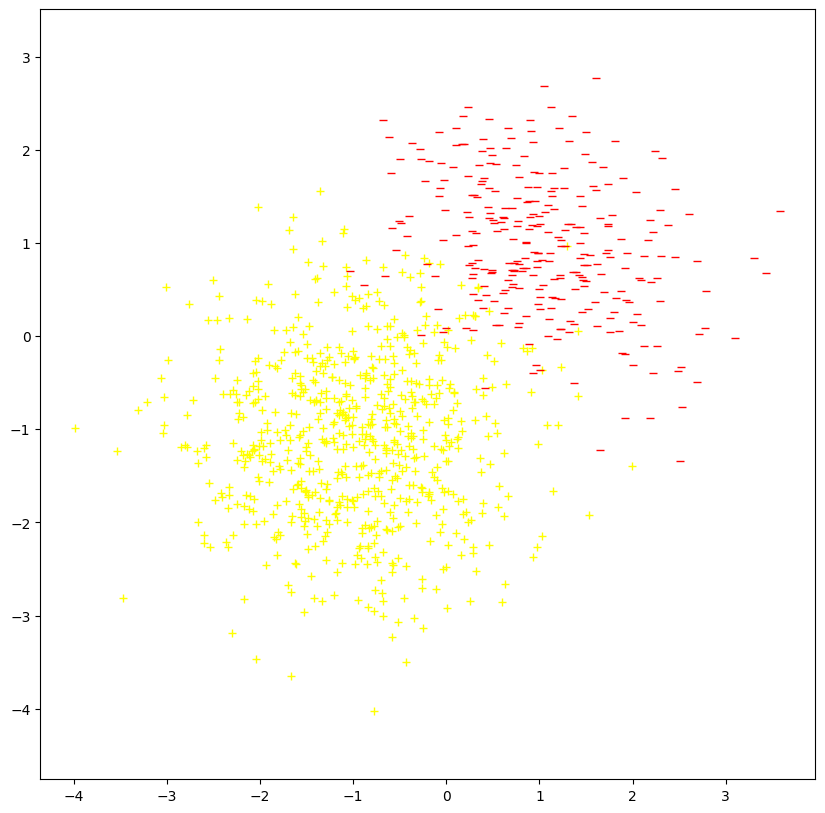

In [51]:
plt.figure(figsize=(10,10))
plt.plot(x1, x2, '+', color='yellow')
plt.plot(y1, y2, '_', color='red')
plt.axis('equal')
plt.show()

In [90]:
first_attribute = np.concatenate((x1,y1))
second_attribute = np.concatenate((x2,y2))

# X is all the first_att combine with the second_att.
X = np.array(list(zip(first_attribute,second_attribute))) 

#randomaly initialize the centers
indice = np.random.choice(len(X), size=2, replace=False)
centers = X[indice]





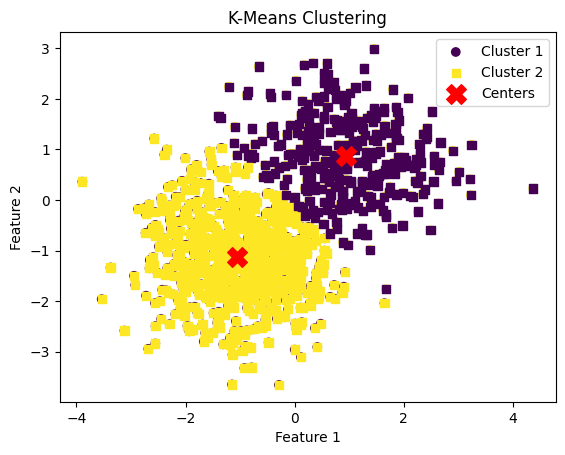

num of iteration is : 9


In [91]:


# W[i][0] = 1 if the data point is closest to the first center otherwise w[i][1] is 1
def classification_phase(X,centers,W):

    for i in range(X.shape[0]):
            if np.linalg.norm(X[i] - centers[0]) < np.linalg.norm(X[i] - centers[1]):
                W[i][0] = 1
                W[i][1] = 0
            else:
                W[i][1] = 1
                W[i][0] = 0

# update every center to be the average of all data points belong to the specific center
def update_centers_phase(X,centers,W):
      for i in range(centers.shape[0]):
            centers[i] = 0  
            for j in range(X.shape[0]):
                centers[i] += X[j] * W[j][i] 
            centers[i] /= sum(W[:,i:i+1]) 
                 
def k_means_clustering(X,centers):
    W = np.zeros((X.shape[0],X.shape[1]))
    max_iterations = 100
    
    for iteration in range(max_iterations):
        old_centers = centers.copy()
        tolerance=1e-6

        classification_phase(X,centers,W)
        update_centers_phase(X,centers,W)  

        if np.allclose(centers, old_centers, atol=tolerance):
            break

        
    # Plotting the final outcome   
    plt.scatter(X[:, 0], X[:, 1], c=W[:, 0], cmap='viridis', marker='o', label='Cluster 1')
    plt.scatter(X[:, 0], X[:, 1], c=W[:, 1], cmap='viridis', marker='s', label='Cluster 2')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-Means Clustering')
    plt.show()  
    print(f'num of iteration is : {iteration}')          
     
                 
k_means_clustering(X,centers)